## Llinear regression project: gapminder_internet

#### In this mini project I'm going to deploy simple and multiple linear regression models to predict the internet usage rate in different countries, and then will evaluate the accuracy of each model:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
gapminder_internet = pd.read_csv('/home/mahdi/python3_files/datasets/gapminder_internet.csv')
gapminder_internet = gapminder_internet.dropna()

In [3]:
gapminder_internet.sample(3)

,country,incomeperperson,internetuserate,urbanrate
70,Ghana,358.979540,9.549931,50.02
15,Barbados,9243.587053,70.028599,39.84
92,Italy,18982.269290,53.740217,68.08


The first step is to check the correlation between the attributes:

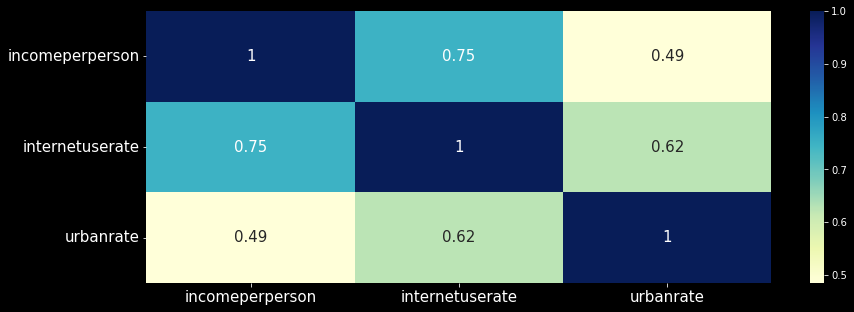

In [4]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14,5));
sns.heatmap(gapminder_internet.corr(), annot=True, annot_kws={'size': 15}, cmap="YlGnBu", );
plt.xticks(size=15);
plt.yticks(size=15, rotation=0);

It could be said that there is a linear correlation (0.75 and 0.62) related to 'internetuserate' attribute.
Now let's see how they are scattered:

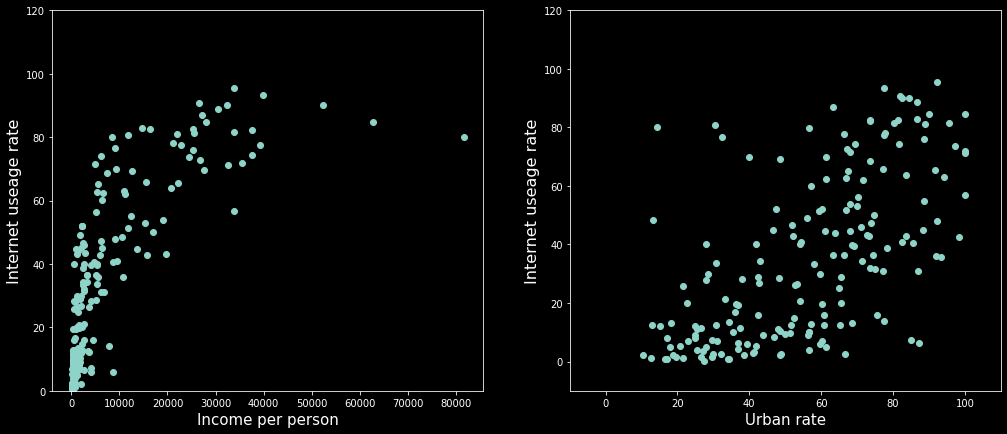

In [5]:
plt.style.use('dark_background')
fig2, ax2 = plt.subplots(1,2, figsize=(17,7));
ax2[0].scatter(gapminder_internet.incomeperperson, gapminder_internet.internetuserate);
ax2[1].scatter(gapminder_internet.urbanrate, gapminder_internet.internetuserate);
ax2[0].set_ylabel('Internet useage rate', size=16)
ax2[0].set_xlabel('Income per person', size=15)
ax2[1].set_ylabel('Internet useage rate', size=16)
ax2[1].set_xlabel('Urban rate', size=15)
plt.sca(ax2[0])
plt.ylim(0, 120);
plt.sca(ax2[1])
plt.ylim(-10, 120);
plt.xlim(-10, 110);

So what I'm going to do is to build three models, one with 'incomeperperson', the other with 'urbanrate', and the last one with 'incomeperperson' and 'urbanrate'; The models will be as below:
- model_1:   θ_0 + (θ_1 * 'incomeperperson') + (θ_2 * 'urbanrate')
- model_2:   θ_0 + (θ_1 * 'incomeperperson') 
- model_3:   θ_0 + (θ_1 * 'urbanrate')

In [6]:
a = input('Enter number of models you want to be generated:')
c = 0
models_df = pd.DataFrame(columns = ['m1_theta_0','m1_theta_1', 'm1_theta_2', 'm1_RMSE', 'm1_MAE', 'm1_R_squared',
                                    'm2_theta_0','m2_theta_1', 'm2_RMSE', 'm2_MAE', 'm2_R_squared',
                                    'm3_theta_0','m3_theta_1', 'm3_RMSE', 'm3_MAE', 'm3_R_squared'])
while(c < int(a)):
    #--------------------------------------------------------------------
    msk = np.random.randn(182)
    train_data = gapminder_internet[msk < 0.8]
    test_data = gapminder_internet[msk > 0.8]
    #--------------------------------------------------------------------
    #Model_1:  θ_0 + (θ_1 * 'incomeperperson') + (θ_2 * 'urbanrate')
    
    regr_1 = linear_model.LinearRegression()
    regr_1.fit(np.asanyarray(train_data[['incomeperperson', 'urbanrate']]), np.asanyarray(train_data[['internetuserate']]))
    m1_test_predicted_values = regr_1.predict(test_data[['incomeperperson', 'urbanrate']].values)
    m1_theta_0 = regr_1.intercept_[0]
    m1_theta_1 = regr_1.coef_[0][0] #incomeperperson
    m1_theta_2 = regr_1.coef_[0][1] #urbanrate
    
    m1_MAE = np.mean(np.abs(m1_test_predicted_values - test_data[['internetuserate']].values))
    m1_MSE = np.mean((m1_test_predicted_values - test_data[['internetuserate']].values) ** 2)
    m1_RMSE = np.sqrt(m1_MSE)
    m1_R_squared = r2_score(test_data[['internetuserate']].values, m1_test_predicted_values)
    #--------------------------------------------------------------------
    #Model_2:  θ_0 + (θ_1 * 'incomeperperson')
    
    regr_2 = linear_model.LinearRegression()
    regr_2.fit(np.asanyarray(train_data[['incomeperperson']]), np.asanyarray(train_data[['internetuserate']]))
    m2_test_predicted_values = regr_2.predict(test_data[['incomeperperson']].values)
    m2_theta_0 = regr_2.intercept_[0]
    m2_theta_1 = regr_2.coef_[0][0] #incomeperperson
    
    m2_MAE = np.mean(np.abs(m2_test_predicted_values - test_data[['internetuserate']].values))
    m2_MSE = np.mean((m2_test_predicted_values - test_data[['internetuserate']].values) ** 2)
    m2_RMSE = np.sqrt(m2_MSE)
    m2_R_squared = r2_score(test_data[['internetuserate']].values, m2_test_predicted_values)
    #--------------------------------------------------------------------
    #Model_3:  θ_0 + (θ_1 * 'urbanrate')
    
    regr_3 = linear_model.LinearRegression()
    regr_3.fit(np.asanyarray(train_data[['urbanrate']]), np.asanyarray(train_data[['internetuserate']]))
    m3_test_predicted_values = regr_3.predict(test_data[['urbanrate']].values)
    m3_theta_0 = regr_3.intercept_[0]
    m3_theta_1 = regr_3.coef_[0][0] #urbanrate
    
    m3_MAE = np.mean(np.abs(m3_test_predicted_values - test_data[['internetuserate']].values))
    m3_MSE = np.mean((m3_test_predicted_values - test_data[['internetuserate']].values) ** 2)
    m3_RMSE = np.sqrt(m3_MSE)
    m3_R_squared = r2_score(test_data[['internetuserate']].values, m3_test_predicted_values)
    #--------------------------------------------------------------------
    models_df = models_df.append({'m1_theta_0': m1_theta_0, 'm1_theta_1': m1_theta_1, 'm1_theta_2': m1_theta_2, 'm1_RMSE': m1_RMSE, 'm1_MAE': m1_MAE, 'm1_R_squared': m1_R_squared,
                                  'm2_theta_0': m2_theta_0, 'm2_theta_1': m2_theta_1, 'm2_RMSE': m2_RMSE, 'm2_MAE': m2_MAE, 'm2_R_squared': m2_R_squared,
                                  'm3_theta_0': m3_theta_0, 'm3_theta_1': m3_theta_1, 'm3_RMSE': m3_RMSE, 'm3_MAE': m3_MAE, 'm3_R_squared': m3_R_squared}, ignore_index=True)
    #--------------------------------------------------------------------
    c+=1    

Enter number of models you want to be generated: 2000


So far we've created our three models, then they've been trained by train set and the test set has been predicted three times.
The process has repeated 2000 times and totally 6000 models have been generated.

Now it's time to evaluate and choose the best model:

In [7]:
models_df[['m3_theta_0','m3_theta_1', 'm3_RMSE', 'm3_MAE', 'm3_R_squared']].sort_values(by='m3_MAE', ascending=False).head(1)

,m3_theta_0,m3_theta_1,m3_RMSE,m3_MAE,m3_R_squared
1653,-9.930762,0.79829,29.215278,24.926742,-0.040278


I decided to evaluate the MAE of the model_3 due to its dispersed partern. As far as the result is concerned, neither MAE nor R_squared is acceptable, so our third model is not at all a good predictor.

In [8]:
models_df[['m2_theta_0','m2_theta_1', 'm2_RMSE', 'm2_MAE', 'm2_R_squared']].sort_values(by='m2_RMSE', ascending=True).head(1)

,m2_theta_0,m2_theta_1,m2_RMSE,m2_MAE,m2_R_squared
247,21.807674,0.001718,12.588237,10.787938,0.797274


For the model_2 I chose its RMSE for its less spread partern.

In [9]:
models_df[['m1_theta_0','m1_theta_1', 'm1_theta_2', 'm1_RMSE', 'm1_MAE', 'm1_R_squared']].sort_values(by='m1_R_squared', ascending=False).head(1)

,m1_theta_0,m1_theta_1,m1_theta_2,m1_RMSE,m1_MAE,m1_R_squared
1238,3.205431,0.001278,0.393013,10.712307,8.569563,0.858344


And lastly for the model_1 wich is the combination of two attributes, I evaluated the R_squared values.
So between model_2 and model_1, model_1 is much more acceptable (due to higher R_squared value and lower RMSE and MAE values).

So our model is:
- model_1: θ_0 + (θ_1 * 'incomeperperson') + (θ_2 * 'urbanrate')
- 3.205431 + (0.001278 * 'incomeperperson') + (0.393013 * 'urbanrate')

----------------